#### Bien chicas!

Tengo algunos comentarios. 
- En primer lugar, les recomendaría que hagan un preámbulo poniendo el nombre del tp, los integrantes del grupo, materia, etc, etc, etc. Más aun si usan jupyter, que tiene una ventaja "estética" por sobre spyder.
- Definan el directorio una vez y no vayan cambiando el lugar de donde sacan los archivos. Pueden hacerlo, pero que sea más fácil replicar los resultados. La idea es que ponga mi directorio al principio y de ahí pueda correr todo. Podrían definir variables como "main", "input", "output" como hacían en Aplicada, así yo solo cambio mi main y listo! Estas son buenas prácticas.
- Importen todas las librerías que vamos a usar al comienzo del script. Esto es una buena práctica también!
- En su trabajo faltaría comentar un poco más el código.. hay muchas líneas de código en donde no se explica qué hacen.

In [5]:
import pandas
import os 
os.chdir('/Users/tomaspacheco/Desktop/ephtp')

In [11]:
#!pip install pandas pyreadstat openpyxl

# COMENTARIO TOMI: YA IMPORTARON PANDAS, NO ES NECESARIO HACERLO OTRA VEZ
import pandas as pd
# Cargar el .dta de 2004
df_2004 = pd.read_stata(r"usu_individual_T104.dta")

# Cargar el .xls de 2024
df_2024 = pd.read_excel(r"usu_individual_T124.xlsx")
df_2004.head(), df_2024.head()

(     CODUSU  nro_hogar componente h15    ano4       trimestre  \
 0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
 1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
 2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
 3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
 4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   
 
               region mas_500              aglomerado  pondera  ... deccfr  \
 0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
 1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
 2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
 3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 
   ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
 0              06      06              04   0.0   0.0   0.0  

In [13]:
# Pasar ambas columnas a mismo type de letra
df_2004.columns = df_2004.columns.str.lower()  # Convertir nombres de columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()

In [15]:
# Filtrar solo los datos de la región NOA
df_2004 = df_2004[df_2004["region"] == "NOA"]
df_2024 = df_2024[df_2024["region"] == 40]

In [17]:
df_2024.to_excel(r"usu_individual_T124_filtrado.xlsx", index=False)
df_2004.to_stata(r"usu_individual_T104_filtrado.dta", write_index=False)

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/883750596.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column componente contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata(r"usu_individual_T104_filtrado.dta", write_index=False)
/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/883750596.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column h15 contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata(r"usu_individual_T104_filtrado.dta", write_index=False)
/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/883750596.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column ch06 c

In [19]:
# Identificar las columnas que existen en ambas bases
columnas_comunes = df_2004.columns.intersection(df_2024.columns)

# Mantener solo las columnas en común
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]

In [21]:
# Unir las bases de datos
df_unificado = pd.concat([df_2004, df_2024], ignore_index=True)

In [25]:
import pandas as pd
# Convertir columnas tipo object a string para compatibilidad con Stata
for col in df_unificado.select_dtypes(include=['object']).columns:
    df_unificado[col] = df_unificado[col].astype(str)
    
df_unificado = df_unificado[df_2004.columns]

# Guardar en Stata
ruta_salida = r"data_unificado.dta"
df_unificado.to_stata(ruta_salida, write_index=False)

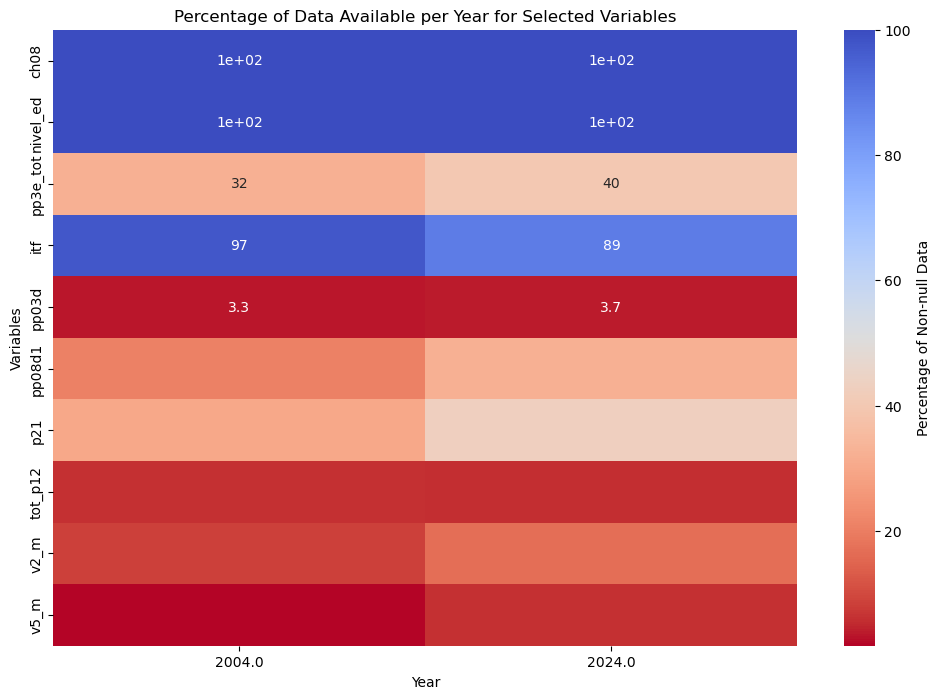

In [27]:
#HEATMAP modelo de la tutorial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo Stata (.dta)
df = pd.read_stata("data_unificado.dta")

# Reemplazar "0" y "0.0" por NaN en todo el DataFrame
df.replace([0, 0.0], np.nan, inplace=True)

# Fijamos la semilla para obtener resultados reproducibles
np.random.seed(123)

# Seleccionamos las 10 variables de interés ==> N
variables_interes = ['ch08', 'nivel_ed', 'pp3e_tot', 'itf', 'pp03d', 'pp08d1', 'p21', 'tot_p12', 'v2_m', 'v5_m']

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Calcular el porcentaje de datos no nulos por año y por variable
percentage_data = df_heatmap.groupby(df['ano4']).apply(lambda x: x.notnull().mean() * 100)

# Transponer para que las variables estén en el eje Y y los años en el eje X
percentage_data = percentage_data.T

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data, annot=True, cmap="coolwarm_r", cbar_kws={'label': 'Percentage of Non-null Data'})
plt.title("Percentage of Data Available per Year for Selected Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()


In [27]:
print(df.shape)

(19092, 172)


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos la base
df = pd.read_stata("data_unificado.dta")

# Borramos las observaciones con ingresos menores a cero
df.loc[df["itf"] < 0, "itf"] = pd.NA
df.loc[df["ipcf"] < 0, "ipcf"] = pd.NA

#Hacemos lo mismo con las horas
df.loc[df["pp3e_tot"] < 0, "pp3e_tot"] = pd.NA
df.loc[df["pp3f_tot"] < 0, "pp3f_tot"] = pd.NA

# Trabajamos con ch06
df["ch06"] = pd.to_numeric(df["ch06"], errors="coerce")

# Corregimos las edades
df.loc[(df["ch06"] < 0) | (df["ch06"] > 110), "ch06"] = pd.NA

# Eliminamos duplicados basados en las tres variables de identificación, manteniendo solo una observación
df = df.drop_duplicates(subset=['codusu', 'nro_hogar', 'componente', 'ano4'], keep='first')

# Guardamos la nueva base
df.to_stata("data_unificado_minimos.dta", write_index=False)


In [57]:
print(df.shape)


(19092, 172)


In [31]:
import pandas as pd

# Cargamos la base
df = pd.read_stata("data_unificado_minimos.dta")

# Función para normalizar texto
def normalizar(texto):
    if isinstance(texto, str):
        return texto.strip().lower().replace('á', 'a').replace('é', 'e')\
                                   .replace('í', 'i').replace('ó', 'o')\
                                   .replace('ú', 'u').replace('ñ', 'n')
    return texto

### COMENTARIO TOMI: MUY COPIADO DE CHATGPT EL NUMERO 1 ESE...

# 1️⃣ Normalizar nombres de columnas
df.columns = [normalizar(col) for col in df.columns]

# 2️⃣ Normalizar valores de todas las variables de tipo objeto (texto)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(normalizar)

# Guardamos la base modificada
df.to_stata("data_unificado_normalizado.dta", write_index=False)

In [67]:
print(df.shape)

(19092, 172)


In [33]:
# Nos fijamos qué columnas tienen datos de distinto tipo en ambas bases

diff_types = {col: (df[col].dtype, df[col].dtype) 
              for col in df.columns if df[col].dtype != df[col].dtype}

for col, (type_04, type_24) in diff_types.items():
    print(f"Columna: {col} → df_04_pamp: {type_04}, df_24_pamp: {type_24}")

diccionarios = {
    'ch03': {
        'jefe': 1,
        'conyuge/pareja': 2,
        'hijo/hijastro': 3,
        'yerno/nuera': 4,
        'nieto': 5,
        'madre/padre': 6,
        'suegro': 7,
        'hermano': 8,
        'otros familiares': 9,
        'no familiares': 10
    },
    'ch04': {
        'varon': 1,
        'mujer': 2
    },
    'ch07': {
        'casado': 1,
        'separado o divorciado': 2,
        'viudo': 3,
        'soltero': 4,
        'unido': 5
    },
    'ch08': {
        'obra social (incluye pami)': 1,
        'mutual/prepaga/servicio de emergencia': 2,
        'planes y seguros publicos': 3,
        'no paga ni le descuentan': 4,
        'ns./nr.': 9,
        'obra social y mutual/prepaga/servicio de emergencia': 12,
        'obra social y planes y seguros publicos': 13,
        'mutual /prepaga / servicio de emergencia / planes y seguros publicos': 23,
        'obra social, mutual / prepaga / servicio de emergencia y planes y seguros publicos': 123
    },
    'ch09': {
        'si': 1,
        'no': 2,
        'menor de 2 anos': 3
    },
    'ch10': {
        'si, asiste': 1,
        'no asiste, pero asistio': 2,
        'nunca asistio': 3
    },
    'ch11': {
        'publico': 1,
        'privado': 2,
        'ns./nr.': 9
    },
    'ch12': {
        'jardin/preescolar': 1,
        'primario': 2,
        'egb': 3,
        'secundario': 4,
        'polimodal': 5,
        'terciario': 6,
        'universitario': 7,
        'posgrado universitario': 8,
        'educacion especial (discapacitado)': 9
    },
    'ch13': {
        'si': 1,
        'no': 2,
        'ns./nr.': 9
    },
    'ch14': {
        'ninguno': 0,
        'primero': 1,
        'segundo': 2,
        'tercero': 3,
        'cuarto': 4,
        'quinto': 5,
        'sexto': 6,
        'septimo': 7,
        'octavo': 8,
        'noveno': 9,
        'educacion especial': 98,
        'ns./nr.': 99
    },
    'ch15': {
        'en esta localidad': 1,
        'en otra localidad': 2,
        'en otra provincia (especificar)': 3,
        'en un pais limitrofe': 4,
        'en otro pais': 5,
        'ns./nr.': 9
    },
    'ch16': {   
        'en esta localidad': 1,
        'en otra localidad de esta provincia': 2,
        'en otra provincia (especificar)': 3,
        'en un pais limitrofe': 4,
        'en otro pais': 5,
        'no habia nacido': 6
    },
    'nivel_ed': {
        'primaria incompleta (incluye educacion especial)': 1,
        'primaria completa': 2,
        'secundaria incompleta': 3,
        'secundaria completa': 4,
        'superior universitaria incompleta': 5,
        'superior universitaria completa': 6,
        'sin instruccion': 7,
        'ns./nr.': 9
    },
    'estado': {
        'entrevista individual no realizada (no respuesta al cuestion': 0,
        'ocupado': 1,
        'desocupado': 2,
        'inactivo': 3,
        'menor de 10 anos': 4
    },
    'cat_ocup': {
        'patron': 1,
        'cuenta propia': 2,
        'obrero o empleado': 3,
        'trabajador familiar sin remuneracion': 4,
        'ns/nr': 9
    },
    'cat_inac': {
        'jubilado/pensionado': 1,
        'rentista': 2,
        'estudiante': 3,
        'ama de casa': 4,
        'menor de 6 anos': 5,
        'discapacitado': 6,
        'otros': 7
    },
    'pp02e': {
        'esta suspendido': 1,
        'ya tiene trabajo asegurado': 2,
        'se canso de buscar trabajo': 3,
        'hay poco trabajo en esta epoca del ano': 4,
        'por otras razones': 5
    },
    'pp02i': {
        'si': 1,
        'no': 2
    },
    'pp02h': {
    'si': 1,
    'no': 2
    },
    'pp03c': {
        'un solo empleo/ocupacion/actividad': 1,
        'mas de un empleo/ocupacion/actividad': 2
    },
    'pp03g': {
        'si': 1,
        'no': 2
    },
    'pp03h': {
        'podia trabajarlas esa semana': 1,
        'podia empezar a trabajarlas en dos semanas a mas tardar': 2,
        'no podia trabajar mas horas': 3
    },
    'pp03i': {
        'si': 1,
        'no': 2,
        'ns./nr.': 9
    },
    'pp03j': {
        'si': 1,
        'no': 2,
        'ns/nr': 9
    },
    'intensi': {
        'subocupacion horaria demandante': 1,
        'ocupacion plena': 2,
        'sobreocupacion horaria': 3,
        'subocupacion horaria no demandante': 4
    },
    'pp04a': {
        '...estatal?': 1,
        '...privada?': 2,
        '...de otro tipo? (especificar)': 3
    },
    'pp04b1': {
        'casa de familia': 1
    },
    'pp04c': {
        '1 persona': 1,
        '2 personas': 2,
        '3 personas': 3,
        '4 personas': 4,
        '5 personas': 5,
        'de 6 a 10 personas': 6,
        'de 11 a 25 personas': 7,
        'de 26 a 40 personas': 8,
        'de 41 a 100 personas': 9,
        'de 101 a 200 personas': 10,
        'de 201 a 500 personas': 11,
        'mas de 500 personas': 12,
        'ns./nr.': 99
    },
    'pp04c99': {
        'hasta 5': 1,
        'de 6 a 40': 2,
        'mas de 40': 3,
        'ns./nr.': 9
    },
    'pp04g': {
        'en un local/oficina/establecimiento/negocio/taller/chacra/fi': 1,
        'en puesto o kiosco fijo callejero': 2,
        'en vehiculos: bicicleta/moto/auto/barco/bote (no incluye ser': 3,
        'en vehiculo para transporte de personas y mercaderias-aereo': 4,
        'en obras en construccion, de infraestructura, mineria o simi': 5,
        'en esta vivienda': 6,
        'en la vivienda del socio o del patron': 7,
        'en el domicilio/local de los clientes': 8,
        'en la calle/espacios publicos/ambulante/de casa en casa/pues': 9,
        'en otro lugar': 10
    },
    'pp05c_1': {
        'propio (del negocio)': 1,
        'prestado/alquilado': 2,
        'no tiene': 3
    },
    'pp05c_2': {
        'propio (del negocio)': 1,
        'prestado/alquilado': 2,
        'no tiene': 3
    },
    'pp05c_3': {
        'propio (del negocio)': 1,
        'prestado/alquilado': 2,
        'no tiene': 3
    },
    'pp05e': {
        'si': 1,
        'no': 2
    },
    'pp05f': {
        'un solo cliente? (persona, empresa)': 6,
        'distintos clientes? (incluye publico en general)': 7
    },
    'pp05h': {
        'menos de 1 mes': 1,
        'de 1 a 3 meses': 2,
        'mas de 3 a 6 meses': 3,
        'mas de 6 meses a 1 ano': 4,
        'mas de 1 ano': 5
    },
    'pp06a': {
        'no': 1,
        'si': 2
    },
    'pp06e': {
        'es una sociedad juridicamente constituida? (s.a., s.r.l., co': 1,
        'es una sociedad de otra forma legal?': 2,
        'o es una sociedad convenida de palabra?': 3
    },
    'pp06h': {
        'si': 1,
        'no': 2
    }
    
    }


In [35]:
def reemplazar_valores(columna, diccionario):
    print(f"\n🔍 Valores únicos en la columna '{columna.name}': {columna.unique()}")
    valores_no_mapeados = set()

    # Normalizamos el diccionario
    diccionario_normalizado = {normalizar(k): v for k, v in diccionario.items()}

    def mapear_valor(x):
        if isinstance(x, str):
            x_norm = normalizar(x)
            if x_norm in diccionario_normalizado:
                return diccionario_normalizado[x_norm]
            try:
                return float(x)  # si es un número escrito como string
            except:
                valores_no_mapeados.add(x)
                return x
        return x  # si ya es número, lo dejamos

    columna_mapeada = columna.apply(mapear_valor)

    if valores_no_mapeados:
        print(f"⚠️ Valores no mapeados en '{columna.name}': {valores_no_mapeados}")

    return columna_mapeada

In [37]:
for col, dicc in diccionarios.items():
    df[col] = reemplazar_valores(df[col], dicc)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convertir a número después
    
# Guardamos la base limpia
df.to_stata("data_unificado_limpia.dta", write_index=False)


🔍 Valores únicos en la columna 'ch03': ['jefe' 'conyuge/pareja' 'hijo/hijastro' 'nieto' 'madre/padre' 'hermano'
 'otros familiares' 'yerno/nuera' 'no familiares' 'suegro' '1' '2' '3' '5'
 '4' '8' '6' '9' '10' '7']

🔍 Valores únicos en la columna 'ch04': ['mujer' 'varon' '1' '2']

🔍 Valores únicos en la columna 'ch07': ['separado o divorciado' 'unido' 'soltero' 'casado' 'viudo' '3' '5' '2'
 '1' '4']

🔍 Valores únicos en la columna 'ch08': ['obra social y mutual/prepaga/servicio de emergencia'
 'no paga ni le descuentan' 'mutual/prepaga/servicio de emergencia'
 'obra social (incluye pami)' 'ns./nr.' 'planes y seguros publicos'
 'obra social y planes y seguros publicos' '1' '4' '3' '12' '2' '13' '23'
 '9']

🔍 Valores únicos en la columna 'ch09': ['si' 'no' 'menor de 2 anos' '1' '3' '2']

🔍 Valores únicos en la columna 'ch10': ['no asiste, pero asistio' 'si, asiste' 'nunca asistio' '0.0' '2' '1' '0'
 '3']

🔍 Valores únicos en la columna 'ch11': ['0.0' 'publico' 'privado' 'ns./nr.' '0' '1'

In [45]:
import pandas as pd
import numpy as np

# Lista de valores a reemplazar por NaN
valores_missing = ["Ns/Nr", "Ns./Nr.", "ns./nr.", "ns/nr", ""]

# Reemplazar en todo el DataFrame
df.replace(valores_missing, np.nan, inplace=True)

# Guardar la base con los cambios
df.to_stata("data_unificado_missing.dta", write_index=False)

In [41]:
print(df.shape)

(19092, 172)


In [43]:
# Aplicamos la conversión a numérico, manejando errores
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

## COMENTARIO TOMI: NO ME DEJA CORRER EL CODIGO PORQUE 'COLS' NO ESTÁ DEFINIDO...


# Guardamos la base limpia
df.to_stata("data_unificado_limpia.dta", write_index=False)

NameError: name 'cols' is not defined

In [59]:
import pandas as pd
import os

# Definir rutas de entrada y salida
ruta_entrada = "data_unificado_limpia.dta"
ruta_salida = "data_dummies.dta"

# Verificar si la ruta de salida es accesible
directorio_salida = os.path.dirname(ruta_salida)
#if not os.path.exists(directorio_salida):
#    raise FileNotFoundError(f"La carpeta de salida no existe: {directorio_salida}")

# Leer la base de datos
df = pd.read_stata(ruta_entrada)

# Lista de variables en minúsculas
variables_mapeadas_ordenadas = [
    "aglomerado", "cat_inac", "cat_ocup", "ch03", "ch04", "ch07", "ch08", "ch09", "ch10", "ch11", "ch12", "ch13",
    "ch14", "ch15", "ch16", "componente", "estado", "h15", "intensi", "nivel_ed", "pp02c1", "pp02c2", "pp02c3",
    "pp02c4", "pp02c5", "pp02c6", "pp02c7", "pp02c8", "pp02e", "pp02h", "pp02i", "pp03c", "pp03g", "pp03h",
    "pp03i", "pp03j", "pp04a", "pp04b1", "pp04b_cod", "pp04c", "pp04c99", "pp04d_cod", "pp04g", "pp05c_1",
    "pp05c_2", "pp05c_3", "pp05e", "pp05f", "pp05h", "pp06a", "pp06e", "pp06h", "pp07a", "pp07c", "pp07d",
    "pp07e", "pp07f1", "pp07f2", "pp07f3", "pp07f4", "pp07f5", "pp07g1", "pp07g2", "pp07g3", "pp07g4", "pp07g_59",
    "pp07h", "pp07i", "pp07j", "pp10a", "pp10c", "pp10d", "pp10e", "pp11a", "pp11b1", "pp11c", "pp11c99",
    "pp11l", "pp11l1", "pp11m", "pp11n", "pp11o", "pp11p", "pp11q", "pp11r", "pp11s", "pp11t", "trimestre"
]

# Crear dummies asegurando compatibilidad con Stata
for var in variables_mapeadas_ordenadas:
    if var in df.columns:
        dummies = pd.get_dummies(df[var], prefix=var, dummy_na=True)
        df = pd.concat([df, dummies], axis=1)

# Eliminar columnas problemáticas (no numéricas)
df = df.select_dtypes(include=["number"])

# Guardar archivo en formato Stata
df.to_stata(ruta_salida, write_index=False, version=118)

#print(f"Archivo guardado correctamente en: {ruta_salida}")


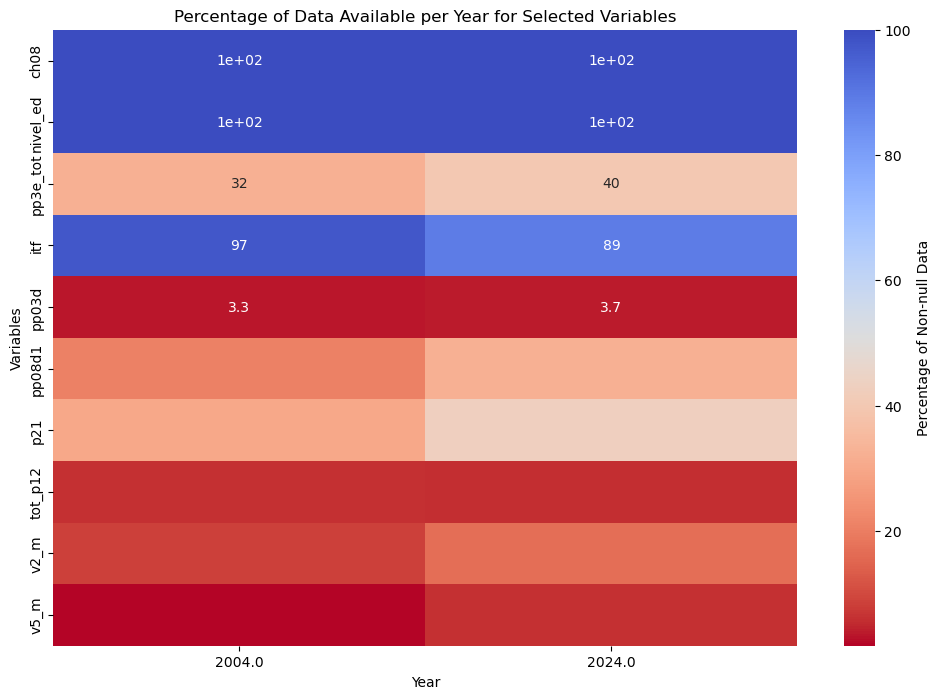

In [61]:
#HEATMAP modelo de la tutorial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo Stata (.dta)
df = pd.read_stata("data_dummies.dta")

# Reemplazar "0" y "0.0" por NaN en todo el DataFrame
df.replace([0, 0.0], np.nan, inplace=True)

# Fijamos la semilla para obtener resultados reproducibles
np.random.seed(123)

# Seleccionamos las 10 variables de interés ==> N
variables_interes = ['ch08', 'nivel_ed', 'pp3e_tot', 'itf', 'pp03d', 'pp08d1', 'p21', 'tot_p12', 'v2_m', 'v5_m']

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Calcular el porcentaje de datos no nulos por año y por variable
percentage_data = df_heatmap.groupby(df['ano4']).apply(lambda x: x.notnull().mean() * 100)

# Transponer para que las variables estén en el eje Y y los años en el eje X
percentage_data = percentage_data.T

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data, annot=True, cmap="coolwarm_r", cbar_kws={'label': 'Percentage of Non-null Data'})
plt.title("Percentage of Data Available per Year for Selected Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()

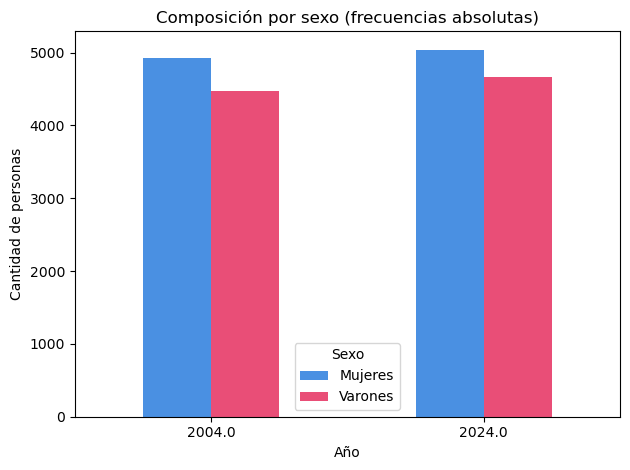

ch04
2.0    5039
1.0    4660
Name: count, dtype: int64


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar base
df = pd.read_stata("data_dummies.dta") 

# Mapear sexo para mayor claridad (opcional)
df['sexo'] = df['ch04'].map({1: 'Varones', 2: 'Mujeres'})

# Calcular frecuencias absolutas
tabla_abs = (
    df.groupby(['ano4', 'sexo'])
    .size()
    .reset_index(name='count')
)

# Pivotear la tabla
tabla_abs = tabla_abs.pivot(index='ano4', columns='sexo', values='count').fillna(0)

# Gráfico de barras
tabla_abs.plot(kind='bar', color=['#4A90E2', '#E94E77'])
plt.title('Composición por sexo (frecuencias absolutas)')
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

print(df[df['ano4'] == 2024]['ch04'].value_counts())

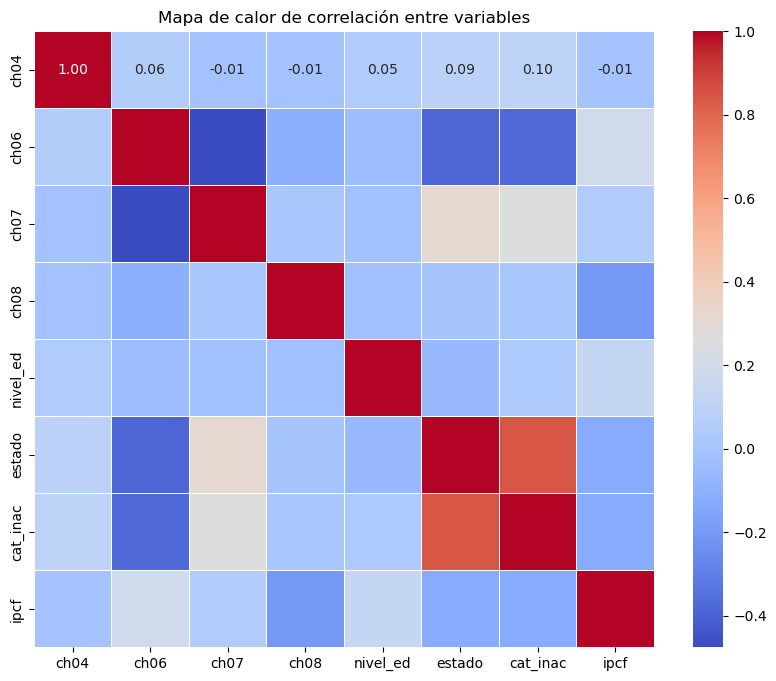

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Stata (.dta)
df = pd.read_stata("data_unificado_limpia.dta")

# Definir las variables de interés
variables_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Convertir a números si hay valores categóricos
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')

# Matriz de correlación
corr_matrix = df_heatmap.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title("Mapa de calor de correlación entre variables")

# Mostrar el gráfico
plt.show()

### Parte 3

In [67]:
import pandas as pd
df = pd.read_stata("data_unificado_limpia.dta")
estado_labels = {0: "null" ,1: "ocupado", 2: "desocupado", 3: "inactivo", 4: "menor"}
df["estado_label"] = df["estado"].map(estado_labels)

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/2935736075.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["estado_label"] = df["estado"].map(estado_labels)


In [69]:
desocupado_count = (df["estado_label"] == "desocupado").sum()
inactivo_count = (df["estado_label"] == "inactivo").sum()

print(f"desocupados: {desocupado_count}")
print(f"inactivos: {inactivo_count}"),

desocupados: 853
inactivos: 7596


(None,)

In [71]:
import pandas as pd
df = pd.read_stata("data_unificado_limpia.dta")



media_ipcf_por_estado = df.groupby("estado")["ipcf"].mean()


print("Media de IPCF por estado laboral:")
print(media_ipcf_por_estado)

Media de IPCF por estado laboral:
estado
0.0       80.843137
1.0    94520.037740
2.0    31755.311958
3.0    70444.697240
4.0    42257.300785
Name: ipcf, dtype: float64


In [73]:
import pandas as pd
df = pd.read_stata("data_unificado_limpia.dta")

(df["estado"] == 0).sum()

17

In [78]:
import pandas as pd
df = pd.read_stata("data_unificado_limpia.dta")

norespondieron = df[(df["estado"] == 0) | (df["estado"].isna())]

respondieron = df[(df["estado"] != 0) & (df["estado"].notna())]

respondieron.to_stata("data_unificado_limpia_respondieron.dta", write_index=False)
norespondieron.to_stata("data_unificado_limpia_norespondieron.dta", write_index=False)

In [82]:
df = pd.read_stata("data_unificado_limpia_respondieron.dta")
df["ano4"].unique()

array([2004., 2024.])

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/1326580695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron["pea"] = respondieron["estado"].apply(lambda x: 1 if x in [1, 2] else 0)


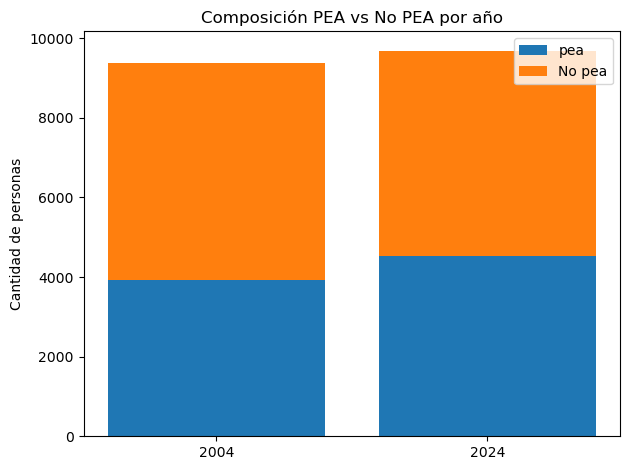

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")
respondieron["pea"] = respondieron["estado"].apply(lambda x: 1 if x in [1, 2] else 0)

pea_counts = respondieron.groupby(["ano4", "pea"]).size().reset_index(name="Cantidad")

pea_2004 = pea_counts[(pea_counts["ano4"] == 2004)]
pea_2024 = pea_counts[(pea_counts["ano4"] == 2024)]


def get_pea_values(df):
    pea = df[df["pea"] == 1]["Cantidad"].values
    no_pea = df[df["pea"] == 0]["Cantidad"].values
    return int(pea[0]) if len(pea) > 0 else 0, int(no_pea[0]) if len(no_pea) > 0 else 0

pea_2004_val, no_pea_2004_val = get_pea_values(pea_2004)
pea_2024_val, no_pea_2024_val = get_pea_values(pea_2024)

labels = ["2004", "2024"]
pea_vals = [pea_2004_val, pea_2024_val]
no_pea_vals = [no_pea_2004_val, no_pea_2024_val]

bar_width = 0.5
x = range(len(labels))

plt.bar(x, pea_vals, label="pea")
plt.bar(x, no_pea_vals, bottom=pea_vals, label="No pea")

plt.xticks(x, labels)
plt.ylabel("Cantidad de personas")
plt.title("Composición PEA vs No PEA por año")
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
# punto 8
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")
df["ch06"]

0        74.0
1        35.0
2        34.0
3        14.0
4        11.0
         ... 
19070    35.0
19071    18.0
19072    14.0
19073     7.0
19074    50.0
Name: ch06, Length: 19075, dtype: float64

/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/2934690618.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron["pet"] = respondieron["ch06"].apply(lambda x: 1 if 15 <= x <= 65  else 0)


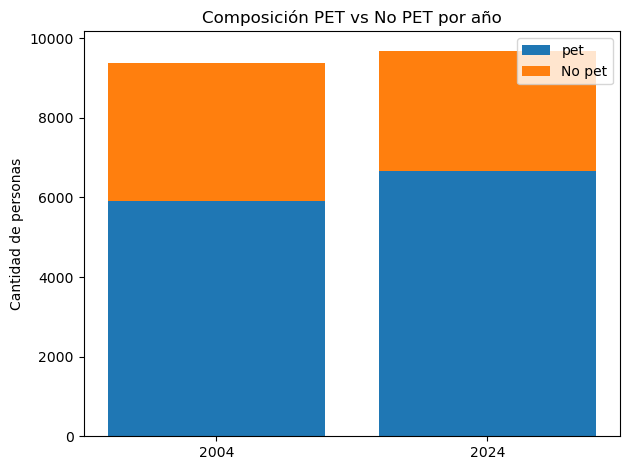

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")

respondieron["pet"] = respondieron["ch06"].apply(lambda x: 1 if 15 <= x <= 65  else 0)

pea_counts = respondieron.groupby(["ano4", "pet"]).size().reset_index(name="Cantidad")

pea_2004 = pea_counts[(pea_counts["ano4"] == 2004)]
pea_2024 = pea_counts[(pea_counts["ano4"] == 2024)]


def get_pea_values(df):
    pea = df[df["pet"] == 1]["Cantidad"].values
    no_pea = df[df["pet"] == 0]["Cantidad"].values
    return int(pea[0]) if len(pea) > 0 else 0, int(no_pea[0]) if len(no_pea) > 0 else 0

pea_2004_val, no_pea_2004_val = get_pea_values(pea_2004)
pea_2024_val, no_pea_2024_val = get_pea_values(pea_2024)

labels = ["2004", "2024"]
pea_vals = [pea_2004_val, pea_2024_val]
no_pea_vals = [no_pea_2004_val, no_pea_2024_val]

bar_width = 0.5
x = range(len(labels))

plt.bar(x, pea_vals, label="pet")
plt.bar(x, no_pea_vals, bottom=pea_vals, label="No pet")

plt.xticks(x, labels)
plt.ylabel("Cantidad de personas")
plt.title("Composición PET vs No PET por año")
plt.legend()
plt.tight_layout()
plt.show()

In [90]:
# punto 9
(df["estado"]==2).sum()

853

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")

respondieron["desocupado"] = respondieron["estado"].apply(lambda x: 1 if  x == 2  else 0)

desocupados_counts = respondieron.groupby(["ano4", "desocupado"]).size().reset_index(name="Cantidad")

desocupados_2004 = desocupados_counts[(desocupados_counts["ano4"] == 2004)]
desocupados_2024 = desocupados_counts[(desocupados_counts["ano4"] == 2024)]


def get_desocupados_values(df):
    desocupados = df[df["desocupado"] == 1]["Cantidad"].values
    no_desocupados = df[df["desocupado"] == 0]["Cantidad"].values
    return int(desocupados[0]) if len(desocupados) > 0 else 0, int(no_desocupados[0]) if len(no_desocupados) > 0 else 0

desocupados_2004_val, no_desocupados_2004_val = get_desocupados_values(desocupados_2004)
desocupados_2024_val, no_desocupados_2024_val = get_desocupados_values(desocupados_2024)

print("desocupados 2004:", desocupados_2004_val)
print("desocupados 2024:", desocupados_2024_val)

desocupados 2004: 597
desocupados 2024: 256


/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/3108699830.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron["desocupado"] = respondieron["estado"].apply(lambda x: 1 if  x == 2  else 0)


In [94]:
# punto 9 a
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")

edu_desocupados = respondieron.groupby(["ano4", "nivel_ed", "desocupado"]).size().reset_index(name="Cantidad")


edu_2004 = edu_desocupados[edu_desocupados["ano4"] == 2004]
edu_2024 = edu_desocupados[edu_desocupados["ano4"] == 2024]


def calcular_proporcion(df):
    total_por_nivel = df.groupby("nivel_ed")["Cantidad"].sum().reset_index(name="Total")
    desocupados_por_nivel = df[df["desocupado"] == 1][["nivel_ed", "Cantidad"]]
    merged = pd.merge(desocupados_por_nivel, total_por_nivel, on="nivel_ed")
    merged["Proporcion_desocupados"] = merged["Cantidad"] / merged["Total"]
    return merged[["nivel_ed", "Proporcion_desocupados"]]


prop_2004 = calcular_proporcion(edu_2004)
prop_2024 = calcular_proporcion(edu_2024)

comparacion = pd.merge(prop_2004, prop_2024, on="nivel_ed", suffixes=("_2004", "_2024"))

print(comparacion)

   nivel_ed  Proporcion_desocupados_2004  Proporcion_desocupados_2024
0       1.0                     0.020039                     0.004573
1       2.0                     0.070956                     0.021842
2       3.0                     0.074181                     0.031186
3       4.0                     0.114769                     0.041725
4       5.0                     0.136405                     0.032100
5       6.0                     0.047452                     0.026383


In [96]:
#punto 9b
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")

respondieron["grupo_edad"] = pd.cut(respondieron["ch06"],
                                    bins=range(0, 101, 10),  
                                    right=False,              
                                    labels=["0-9", "10-19", "20-29", "30-39", "40-49",
                                            "50-59", "60-69", "70-79", "80-89", "90-99"])

edad_desocupados = respondieron.groupby(["ano4", "grupo_edad", "desocupado"]).size().reset_index(name="Cantidad")

edad_2004 = edad_desocupados[edad_desocupados["ano4"] == 2004]
edad_2024 = edad_desocupados[edad_desocupados["ano4"] == 2024]

def calcular_proporcion_edad(df):
    total_por_grupo = df.groupby("grupo_edad")["Cantidad"].sum().reset_index(name="Total")
    desocupados_por_grupo = df[df["desocupado"] == 1][["grupo_edad", "Cantidad"]]
    merged = pd.merge(desocupados_por_grupo, total_por_grupo, on="grupo_edad")
    merged["Proporcion_desocupados"] = merged["Cantidad"] / merged["Total"]
    return merged[["grupo_edad", "Proporcion_desocupados"]]

prop_edad_2004 = calcular_proporcion_edad(edad_2004)
prop_edad_2024 = calcular_proporcion_edad(edad_2024)

comparacion_edad = pd.merge(prop_edad_2004, prop_edad_2024, on="grupo_edad", suffixes=("_2004", "_2024"))

print(comparacion_edad)

  grupo_edad  Proporcion_desocupados_2004  Proporcion_desocupados_2024
0        0-9                     0.000000                     0.000000
1      10-19                     0.050962                     0.016332
2      20-29                     0.171241                     0.063151
3      30-39                     0.078349                     0.043134
4      40-49                     0.059499                     0.028761
5      50-59                     0.052897                     0.019129
6      60-69                     0.032443                     0.010588
7      70-79                     0.008876                     0.001866
8      80-89                     0.000000                     0.000000
9      90-99                     0.000000                     0.000000


/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/1448333619.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron["grupo_edad"] = pd.cut(respondieron["ch06"],
/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/1448333619.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edad_desocupados = respondieron.groupby(["ano4", "grupo_edad", "desocupado"]).size().reset_index(name="Cantidad")
/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/ipykernel_43924/1448333619.py:19: FutureWarning: The default of observed=False is deprecated and 

#punto 9 incisio C, elegimos variable interes sexo (ch04)

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("data_unificado_limpia_respondieron.dta")

edu_desocupados = respondieron.groupby(["ano4", "ch04", "desocupado"]).size().reset_index(name="Cantidad")


edu_2004 = edu_desocupados[edu_desocupados["ano4"] == 2004]
edu_2024 = edu_desocupados[edu_desocupados["ano4"] == 2024]


def calcular_proporcion(df):
    total_por_nivel = df.groupby("ch04")["Cantidad"].sum().reset_index(name="Total")
    desocupados_por_nivel = df[df["desocupado"] == 1][["ch04", "Cantidad"]]
    merged = pd.merge(desocupados_por_nivel, total_por_nivel, on="ch04")
    merged["Proporcion_desocupados"] = merged["Cantidad"] / merged["Total"]
    return merged[["ch04", "Proporcion_desocupados"]]


prop_2004 = calcular_proporcion(edu_2004)
prop_2024 = calcular_proporcion(edu_2024)

comparacion = pd.merge(prop_2004, prop_2024, on="ch04", suffixes=("_2004", "_2024"))

print(comparacion)

   ch04  Proporcion_desocupados_2004  Proporcion_desocupados_2024
0   1.0                     0.065934                     0.031357
1   2.0                     0.061510                     0.021851


    Año  Tasa INDEC (%)  Tasa Econ. Laboral (%)
0  2004       15.175394                6.361215
1  2024        5.664970                2.641899


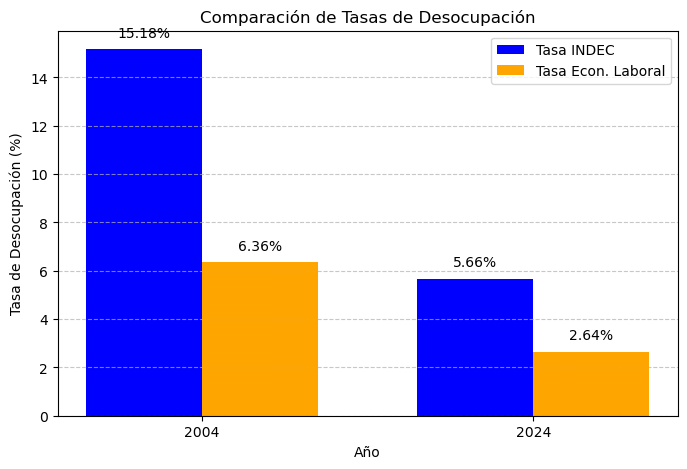

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_tasas_desocupacion(df, year):
    """Calcula la tasa de desocupación oficial y alternativa para un año dado."""
    df_year = df[df['ano4'] == year].dropna(subset=['estado'])

    if df_year.empty:
        print(f"No hay datos para el año {year}.")
        return None, None

    # Definiciones de INDEC
    desocupados = df_year[df_year['estado'] == 2]  # 2 = Desocupado
    PEA = df_year[df_year['estado'].isin([1, 2])]  # 1 = Ocupado, 2 = Desocupado
    PET = df_year  # Toda la población en edad de trabajar (sin valores nulos)

    tasa_desocupacion_indec = (len(desocupados) / len(PEA) * 100) if len(PEA) > 0 else None
    tasa_desocupacion_alternativa = (len(desocupados) / len(PET) * 100) if len(PET) > 0 else None

    return tasa_desocupacion_indec, tasa_desocupacion_alternativa

# Cargar base de datos con manejo de errores
try:
    df = pd.read_stata("data_unificado_limpia_respondieron.dta")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    df = None

if df is not None:
    # Convertir tipos para evitar problemas de comparación
    df['ano4'] = pd.to_numeric(df['ano4'], errors='coerce')
    df['estado'] = pd.to_numeric(df['estado'], errors='coerce')

    # Años de análisis
    years = [2004, 2024]

    # Calcular tasas
    tasas = {year: calcular_tasas_desocupacion(df, year) for year in years}

    # Crear tabla de resultados si hay datos
    if all(tasas[year][0] is not None for year in years):
        datos = {
            'Año': years,
            'Tasa INDEC (%)': [tasas[year][0] for year in years],
            'Tasa Econ. Laboral (%)': [tasas[year][1] for year in years]
        }

        tabla = pd.DataFrame(datos)
        print(tabla)

        # Gráfico de barras
        ancho_barra = 0.35  # Ancho de las barras
        x = range(len(years))  # Posiciones en el eje X

        plt.figure(figsize=(8, 5))
        plt.bar(x, tabla['Tasa INDEC (%)'], width=ancho_barra, label='Tasa INDEC', color='blue')
        plt.bar([i + ancho_barra for i in x], tabla['Tasa Econ. Laboral (%)'], width=ancho_barra, label='Tasa Econ. Laboral', color='orange')

        # Etiquetas de valores sobre las barras
        for i, v in enumerate(tabla['Tasa INDEC (%)']):
            plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)
        for i, v in enumerate(tabla['Tasa Econ. Laboral (%)']):
            plt.text(i + ancho_barra, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

        plt.xticks([i + ancho_barra / 2 for i in x], years)  # Etiquetas centradas en el eje X
        plt.xlabel('Año')
        plt.ylabel('Tasa de Desocupación (%)')
        plt.title('Comparación de Tasas de Desocupación')
        plt.legend()
        plt.grid(axis='y', linestyle='dashed', alpha=0.7)
        plt.show()
    else:
        print("No se pudo generar la tabla por falta de datos.")
